# Loan Data Exploration
## by Prashanth Subrahmanyam

## Preliminary Wrangling

The loan data set provided by prosper contains data for upwards of 110K loans, with over 80 variables about each loan such as loan amount, interest rate, loan status, borrower income and so on.

In [437]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [438]:
# read in and explore the dataset
loans = pd.read_csv('prosperLoanData.csv')
loans.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [439]:
loans.shape

(113937, 81)

In [440]:
# since there are a lot of columns, let's see the columns 10 at a time in order to better understand the data
loans.loc[:,loans.columns[0:10]].sample(5)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield
5337,95AE3573091374458384B1C,722052,2013-03-01 21:00:47.057000000,NaN,60,Current,NaN,0.10878,0.0869,0.0769
76316,5A87355436896839978FE64,624393,2012-08-14 14:29:27.630000000,NaN,36,Current,NaN,0.35797,0.3177,0.3077
67761,D0CB358172070064944E561,820361,2013-06-25 09:00:35.020000000,NaN,36,Current,NaN,0.08325,0.0699,0.0599
109835,681F3384919779440D4FE76,111656,2007-03-15 17:37:44.577000000,D,36,Completed,2009-03-31 00:00:00,0.18877,0.1815,0.1615
34764,D76B355398104201545652A,616894,2012-07-25 19:11:04.287000000,NaN,36,Past Due (61-90 days),NaN,0.35797,0.3177,0.3077


In [441]:
loans.loc[:,loans.columns[10:20]].sample(5)

,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus
15255,0.16717,0.0849,0.08227,4.0,C,2.0,1,MA,Sales - Retail,Employed
22945,0.05800,0.0150,0.05800,7.0,AA,9.0,1,PA,Professional,Full-time
16359,NaN,NaN,NaN,NaN,NaN,NaN,7,KY,Other,Retired
7817,0.13203,0.0574,0.07463,5.0,B,9.0,15,DC,Teacher,Employed
97953,0.28610,0.1300,0.15610,2.0,E,5.0,1,MI,Other,Full-time


In [442]:
loans.loc[:,loans.columns[20:30]].sample(5)

,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines
93300,52.0,False,False,NaN,2011-01-20 08:23:51,720.0,739.0,1996-11-27 00:00:00,8.0,8.0
65343,212.0,True,False,NaN,2013-12-28 17:15:08,700.0,719.0,1995-07-01 00:00:00,10.0,10.0
13188,21.0,False,False,NaN,2014-01-03 07:58:20,660.0,679.0,1987-04-01 00:00:00,5.0,5.0
25687,NaN,False,True,B0473364376920128370B13,2007-02-06 11:21:43.687000000,640.0,659.0,1988-10-17 00:00:00,NaN,NaN
102044,115.0,False,True,85943386927308216031C0F,2007-08-06 16:21:10.373000000,720.0,739.0,1995-09-20 00:00:00,18.0,16.0


In [443]:
loans.loc[:,loans.columns[30:40]].sample(5)

,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months
46006,36.0,8,563.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37907,60.0,18,1156.0,9.0,14.0,0.0,NaN,0.0,0.0,NaN
71541,19.0,14,528.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96934,51.0,7,545.0,2.0,10.0,0.0,0.0,0.0,0.0,0.0
25916,23.0,4,100.0,0.0,1.0,0.0,0.0,26.0,1.0,0.0


In [444]:
loans.loc[:,loans.columns[40:50]].sample(5)

,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome
86983,483511.0,0.89,54181.0,39.0,1.00,2.0,0.06,"$100,000+",True,22083.333333
87741,49960.0,0.54,32827.0,50.0,1.00,1.0,0.39,"$75,000-99,999",True,7083.333333
111442,77.0,0.07,923.0,19.0,0.84,2.0,NaN,"$50,000-74,999",False,4166.666667
5935,89686.0,0.91,8215.0,47.0,1.00,0.0,0.20,"$100,000+",True,12500.000000
87983,346.0,0.03,9954.0,7.0,0.66,1.0,0.40,"$1-24,999",True,2000.000000


In [445]:
loans.loc[:,loans.columns[50:60]].sample(5)

,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent
13831,40DB3590774180471018C1E,1.0,8.0,8.0,0.0,0.0,4500.0,3649.24,-12.0,1140
30637,FDDE36055601664458AB481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
19714,13C53698847376891DF1049,1.0,10.0,10.0,0.0,0.0,4000.0,3184.05,NaN,0
47577,A7C736115624525716E7530,3.0,33.0,33.0,0.0,0.0,13900.0,0.01,86.0,0
8117,DEA63706054711035FE0C80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [446]:
loans.loc[:,loans.columns[60:70]].sample(5)

,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments
78237,NaN,31,51976,5000,2011-08-04 00:00:00,Q3 2011,177934817878934812E27F1,162.02,5537.8800,4999.99
70086,NaN,3,124456,13000,2013-12-31 00:00:00,Q4 2013,AA933701876187835C9391C,324.83,643.5162,288.95
77211,NaN,74,24277,7000,2008-01-03 00:00:00,Q1 2008,340634090779138018BFE68,216.14,7358.6500,7000.00
96816,NaN,4,108678,10000,2013-11-06 00:00:00,Q4 2013,F95636959243811056FAE8D,282.48,847.4400,270.56
18452,NaN,41,44886,10000,2010-10-20 00:00:00,Q4 2010,6F4C3364565643020BAD4A7,340.08,11853.3800,10000.00


In [447]:
loans.loc[:,loans.columns[70:81]].sample(5)

,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
86777,1207.8500,-33.55,0.00,0.00,0.00,0.0,1.0,0,0,0.0,91
96583,218.5841,-11.51,0.00,0.00,0.00,0.0,1.0,0,0,0.0,1
105187,857.6800,-57.75,0.00,0.00,0.00,0.0,1.0,0,0,0.0,131
73652,674.9900,-25.96,0.00,0.00,0.00,0.0,1.0,0,0,0.0,36
26669,772.2900,-33.92,-64.05,1328.49,1388.49,0.0,1.0,0,0,0.0,114


In [448]:
# get info about the different columns
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

From the description of the structure of the data, we are interested in only the below variables for this exploration.
- 

In [449]:
# Trying to understand Interest Rates and Yield.
# Are these rates always in the order BorrowerAPR > BorrowerRate > LenderYield
print(loans.query('BorrowerAPR < BorrowerRate').shape)
print(loans.query('BorrowerRate < LenderYield').shape)

(0, 81)
(0, 81)


In [450]:
# Understand the 2 rating systems
print(loans.loc[:,'CreditGrade'].unique())
print(loans.loc[:,'ProsperRating (Alpha)'].unique())

['C' nan 'HR' 'AA' 'D' 'B' 'E' 'A' 'NC']
[nan 'A' 'D' 'B' 'E' 'C' 'AA' 'HR']


In [451]:
# Is there much difference between listing creation and loan origination?
# loans.loc[:,['ListingCreationDate', 'LoanOriginationDate']].sample(10)
listing_to_loan_dates = pd.to_datetime(loans['LoanOriginationDate']) - pd.to_datetime(loans['ListingCreationDate'])
print(listing_to_loan_dates.max(), '\n', listing_to_loan_dates.min(), '\n', listing_to_loan_dates.mean())

1094 days 04:32:46.493000 
 0 days 09:43:12.187000 
 11 days 19:10:55.969021


In [452]:
# What were the occupations specified
loans.loc[:,'Occupation'].unique()

array(['Other', 'Professional', 'Skilled Labor', 'Executive',
       'Sales - Retail', 'Laborer', 'Food Service', 'Fireman',
       'Waiter/Waitress', 'Construction', 'Computer Programmer',
       'Sales - Commission', 'Retail Management', 'Engineer - Mechanical',
       'Military Enlisted', 'Clerical', nan, 'Teacher', 'Clergy',
       'Accountant/CPA', 'Attorney', 'Nurse (RN)', 'Analyst',
       "Nurse's Aide", 'Investor', 'Realtor', 'Flight Attendant',
       'Nurse (LPN)', 'Military Officer', 'Food Service Management',
       'Truck Driver', 'Administrative Assistant',
       'Police Officer/Correction Officer', 'Social Worker',
       'Tradesman - Mechanic', 'Medical Technician', 'Professor',
       'Postal Service', 'Civil Service', 'Pharmacist',
       'Tradesman - Electrician', 'Scientist', 'Dentist',
       'Engineer - Electrical', 'Architect', 'Landscaping',
       'Tradesman - Carpenter', 'Bus Driver', 'Tradesman - Plumber',
       'Engineer - Chemical', 'Doctor', 'Chemist',


In [453]:
# What were the employment statuses specified?
loans.loc[:,'EmploymentStatus'].value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

In [454]:
# How does the data look for Listing Categories
loans.loc[:,'ListingCategory (numeric)'].value_counts()

1     58308
0     16965
7     10494
2      7433
3      7189
6      2572
4      2395
13     1996
15     1522
18      885
14      876
20      771
19      768
5       756
16      304
11      217
8       199
10       91
9        85
12       59
17       52
Name: ListingCategory (numeric), dtype: int64

In [455]:
# What is the spread of interest rates?
loans[['BorrowerAPR', 'BorrowerRate']].describe()

,BorrowerAPR,BorrowerRate
count,113912.000000,113937.000000
mean,0.218828,0.192764
std,0.080364,0.074818
min,0.006530,0.000000
25%,0.156290,0.134000
50%,0.209760,0.184000
75%,0.283810,0.250000
max,0.512290,0.497500


In [456]:
# does varifiable income matter as a factor?
loans['IncomeVerifiable'].value_counts()

True     105268
False      8669
Name: IncomeVerifiable, dtype: int64

### What is the structure of your dataset?

The Loans dataset contains 113937 records with 81 data points about each loan. Some of the salient points that can be observed about the dataset are as below
- There are two kinds of credit ratings in the dataset, one which is _CreditGrade_ which contains ratings for loans pre-2009 and the other which is _ProsperRating_ which is given to loans originating after July 2009.
- About 50% of the loans in the dataset are already closed.
- There are various fields about the listing itself, there are various fields about the loan, and then there are many fields about the borrower current state of employment, income and credit ratings. 

In fact a good number of fields do not have data in all the rows as they are either dependent on the time (pre 2009 vs post), or on whether the borrower had a prior credits or relationship with prosper.

### What is/are the main feature(s) of interest in your dataset?

We would like to focus on the APR of the Borrower and what are the factors that affect the APR

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Some of the data points that are related to the APR will of course be the credit scores and credit ratings of the borrower. The rate might also be dependant on the loan tenure and loan amounts that have been opted for. The rate could also depend on the employment status and income of the borrower. The final thing that would be interesting would be to see if the interest rates change with calendar.

## More Wrangling

In [457]:
loans_apr = loans.copy()

In [458]:
# let's now only take those fields that we are interested in. We want to explore factors that affect the Borrower APR
columns = ['CreditGrade', 'Term', 'BorrowerAPR', 'ProsperRating (Alpha)', 'EmploymentStatus', 'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'CurrentCreditLines', 'DebtToIncomeRatio', 'StatedMonthlyIncome', 'LoanOriginalAmount', 'LoanOriginationDate', 'LoanOriginationQuarter']
loans_apr = loans_apr.filter(items=columns)
loans_apr.shape

(113937, 15)

In [459]:
# Let's merge the credit rating data for pre 2009 and post 2009.
loans_apr['CreditRating'] = loans_apr['ProsperRating (Alpha)'].combine_first(loans_apr['CreditGrade'])
loans_apr = loans_apr.drop(columns=['ProsperRating (Alpha)', 'CreditGrade'])
loans_apr = loans_apr.fillna(value={'CreditRating':'NA'})
loans_apr['CreditRating'].isna().sum()

0

In [460]:
# Now convert the CreditRatings into an ordinal type
credit_ratings = ['NA', 'HR', 'E', 'D', 'C', 'B', 'A','AA']
credit_type = pd.api.types.CategoricalDtype(credit_ratings, ordered=True)
loans_apr.loc[:,'CreditRating'] = loans_apr['CreditRating'].astype(credit_type)
loans_apr['CreditRating'].unique()

[C, A, HR, D, B, E, AA, NA, NaN]
Categories (8, object): [NA < HR < E < D < C < B < A < AA]

In [461]:
# Convert credit score to average
loans_apr.loc[:,'CreditScoreRangeAverage'] = (loans_apr['CreditScoreRangeLower'] + loans_apr['CreditScoreRangeUpper']) / 2
loans_apr = loans_apr.drop(columns=['CreditScoreRangeLower', 'CreditScoreRangeUpper'])
loans_apr.loc[:,'CreditScoreRangeAverage'] = loans_apr['CreditScoreRangeAverage'].apply(np.floor)
loans_apr.head()

,Term,BorrowerAPR,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentCreditLines,DebtToIncomeRatio,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,CreditRating,CreditScoreRangeAverage
0,36,0.16516,Self-employed,2.0,True,5.0,0.17,3083.333333,9425,2007-09-12 00:00:00,Q3 2007,C,649.0
1,36,0.12016,Employed,44.0,False,14.0,0.18,6125.000000,10000,2014-03-03 00:00:00,Q1 2014,A,689.0
2,36,0.28269,Not available,NaN,False,NaN,0.06,2083.333333,3001,2007-01-17 00:00:00,Q1 2007,HR,489.0
3,36,0.12528,Employed,113.0,True,5.0,0.15,2875.000000,10000,2012-11-01 00:00:00,Q4 2012,A,809.0
4,36,0.24614,Employed,44.0,True,19.0,0.26,9583.333333,15000,2013-09-20 00:00:00,Q3 2013,D,689.0


In [462]:
# nullify missing data
loans_apr = loans_apr.fillna(value={'CreditScoreRangeAverage': 0})
loans_apr['CreditScoreRangeAverage'].isnull().sum()

0

In [463]:
# and convert to int type
loans_apr.loc[:, 'CreditScoreRangeAverage'] = loans_apr['CreditScoreRangeAverage'].astype(int)

In [464]:
# Split the loan origination quarter columns into quarters and years and convert origination date to datetime
loans_apr[['LoanOriginationQuarter', 'LoanOriginationYear']] = loans_apr['LoanOriginationQuarter'].str.split(expand=True)
loans_apr.loc[:,'LoanOriginationYear'] = loans_apr['LoanOriginationYear'].astype(int)
loans_apr.loc[:,'LoanOriginationDate'] = pd.to_datetime(loans_apr['LoanOriginationDate'])
loans_apr.head()

,Term,BorrowerAPR,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentCreditLines,DebtToIncomeRatio,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,CreditRating,CreditScoreRangeAverage,LoanOriginationYear
0,36,0.16516,Self-employed,2.0,True,5.0,0.17,3083.333333,9425,2007-09-12,Q3,C,649,2007
1,36,0.12016,Employed,44.0,False,14.0,0.18,6125.000000,10000,2014-03-03,Q1,A,689,2014
2,36,0.28269,Not available,NaN,False,NaN,0.06,2083.333333,3001,2007-01-17,Q1,HR,489,2007
3,36,0.12528,Employed,113.0,True,5.0,0.15,2875.000000,10000,2012-11-01,Q4,A,809,2012
4,36,0.24614,Employed,44.0,True,19.0,0.26,9583.333333,15000,2013-09-20,Q3,D,689,2013


In [509]:
quarters = ['Q1', 'Q2', 'Q3', 'Q4']
quarter_type = pd.api.types.CategoricalDtype(quarters, ordered=True)
loans_apr.loc[:,'LoanOriginationQuarter'] = loans_apr['LoanOriginationQuarter'].astype(quarter_type)
loans_apr.loc[:,'LoanOriginationQuarter'].unique()

[Q3, Q1, Q4, Q2]
Categories (4, object): [Q1 < Q2 < Q3 < Q4]

In [465]:
# Convert Employment duration to int and fill NaNs
loans_apr = loans_apr.fillna(value={'EmploymentStatusDuration': 0})
loans_apr.loc[:,'EmploymentStatusDuration'] = loans_apr['EmploymentStatusDuration'].astype(int)
loans_apr.head()

,Term,BorrowerAPR,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentCreditLines,DebtToIncomeRatio,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,CreditRating,CreditScoreRangeAverage,LoanOriginationYear
0,36,0.16516,Self-employed,2,True,5.0,0.17,3083.333333,9425,2007-09-12,Q3,C,649,2007
1,36,0.12016,Employed,44,False,14.0,0.18,6125.000000,10000,2014-03-03,Q1,A,689,2014
2,36,0.28269,Not available,0,False,NaN,0.06,2083.333333,3001,2007-01-17,Q1,HR,489,2007
3,36,0.12528,Employed,113,True,5.0,0.15,2875.000000,10000,2012-11-01,Q4,A,809,2012
4,36,0.24614,Employed,44,True,19.0,0.26,9583.333333,15000,2013-09-20,Q3,D,689,2013


In [466]:
# Similarly for current credit lines
loans_apr = loans_apr.fillna(value={'CurrentCreditLines': 0})
loans_apr.loc[:,'CurrentCreditLines'] = loans_apr['CurrentCreditLines'].astype(int)
loans_apr.head()

,Term,BorrowerAPR,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentCreditLines,DebtToIncomeRatio,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,CreditRating,CreditScoreRangeAverage,LoanOriginationYear
0,36,0.16516,Self-employed,2,True,5,0.17,3083.333333,9425,2007-09-12,Q3,C,649,2007
1,36,0.12016,Employed,44,False,14,0.18,6125.000000,10000,2014-03-03,Q1,A,689,2014
2,36,0.28269,Not available,0,False,0,0.06,2083.333333,3001,2007-01-17,Q1,HR,489,2007
3,36,0.12528,Employed,113,True,5,0.15,2875.000000,10000,2012-11-01,Q4,A,809,2012
4,36,0.24614,Employed,44,True,19,0.26,9583.333333,15000,2013-09-20,Q3,D,689,2013


In [467]:
# similarly for term
loans_apr = loans_apr.fillna(value={'Term': 0})
loans_apr.loc[:,'Term'] = loans_apr['Term'].astype(int)
loans_apr.head()

,Term,BorrowerAPR,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentCreditLines,DebtToIncomeRatio,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,CreditRating,CreditScoreRangeAverage,LoanOriginationYear
0,36,0.16516,Self-employed,2,True,5,0.17,3083.333333,9425,2007-09-12,Q3,C,649,2007
1,36,0.12016,Employed,44,False,14,0.18,6125.000000,10000,2014-03-03,Q1,A,689,2014
2,36,0.28269,Not available,0,False,0,0.06,2083.333333,3001,2007-01-17,Q1,HR,489,2007
3,36,0.12528,Employed,113,True,5,0.15,2875.000000,10000,2012-11-01,Q4,A,809,2012
4,36,0.24614,Employed,44,True,19,0.26,9583.333333,15000,2013-09-20,Q3,D,689,2013


In [468]:
# Would like to round the monthly income to integers as well
loans_apr.loc[:,'StatedMonthlyIncome'] = loans_apr['StatedMonthlyIncome'].astype(int)
loans_apr.head()

,Term,BorrowerAPR,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentCreditLines,DebtToIncomeRatio,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,CreditRating,CreditScoreRangeAverage,LoanOriginationYear
0,36,0.16516,Self-employed,2,True,5,0.17,3083,9425,2007-09-12,Q3,C,649,2007
1,36,0.12016,Employed,44,False,14,0.18,6125,10000,2014-03-03,Q1,A,689,2014
2,36,0.28269,Not available,0,False,0,0.06,2083,3001,2007-01-17,Q1,HR,489,2007
3,36,0.12528,Employed,113,True,5,0.15,2875,10000,2012-11-01,Q4,A,809,2012
4,36,0.24614,Employed,44,True,19,0.26,9583,15000,2013-09-20,Q3,D,689,2013


In [469]:
# Debt to income ratio needs to be cleaned up of null values. Let us set this to 0
loans_apr = loans_apr.fillna(value={'DebtToIncomeRatio':0.0})
loans_apr.DebtToIncomeRatio.isna().sum()

0

In [470]:
# Employment status too seems to have null values
loans_apr[(loans_apr.EmploymentStatus.isna() == True) & (loans_apr.EmploymentStatusDuration > 0)].size

0

In [471]:
loans_apr[(loans_apr.EmploymentStatus == "Not available") & (loans_apr.EmploymentStatusDuration > 0)].size

0

In [472]:
loans_apr[(loans_apr.EmploymentStatus == "Not employed") & (loans_apr.EmploymentStatusDuration > 0)].head()

,Term,BorrowerAPR,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentCreditLines,DebtToIncomeRatio,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,CreditRating,CreditScoreRangeAverage,LoanOriginationYear
66,36,0.16802,Not employed,1,False,4,0.2,860,1000,2007-04-17,Q2,D,629,2007
100,36,0.35356,Not employed,12,False,3,0.0,0,4000,2013-01-30,Q1,HR,729,2013
125,36,0.35643,Not employed,8,False,7,0.0,0,5000,2011-05-26,Q2,E,649,2011
170,36,0.28851,Not employed,9,True,7,0.0,0,10000,2012-04-17,Q2,D,769,2012
186,36,0.35797,Not employed,7,False,3,0.0,0,4000,2012-02-16,Q1,HR,669,2012


In [473]:
loans_apr[(loans_apr.EmploymentStatus == "Other") & (loans_apr.EmploymentStatusDuration > 0)].head()

,Term,BorrowerAPR,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentCreditLines,DebtToIncomeRatio,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,CreditRating,CreditScoreRangeAverage,LoanOriginationYear
15,36,0.35797,Other,121,True,10,0.49,5500,4000,2012-04-19,Q2,HR,709,2012
22,36,0.35356,Other,68,False,9,9.20,118,4000,2013-02-05,Q1,HR,709,2013
31,36,0.35797,Other,44,False,0,0.04,2250,2000,2012-09-27,Q3,HR,689,2012
34,36,0.22966,Other,426,True,6,0.17,4058,10000,2014-02-27,Q1,C,649,2014
38,36,0.08930,Other,539,True,19,0.14,6000,7000,2013-08-22,Q3,AA,809,2013


In [474]:
# Above checks means that all NaN status are in the status Not available and so we'll set it accordingly.
loans_apr = loans_apr.fillna(value={'EmploymentStatus':'Not available'})
loans_apr.loc[:,'EmploymentStatus'].value_counts()

Employed         67322
Full-time        26355
Not available     7602
Self-employed     6134
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

In [511]:
# Checking the fields
loans_apr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 14 columns):
Term                        113937 non-null int64
BorrowerAPR                 113912 non-null float64
EmploymentStatus            113937 non-null object
EmploymentStatusDuration    113937 non-null int64
IsBorrowerHomeowner         113937 non-null bool
CurrentCreditLines          113937 non-null int64
DebtToIncomeRatio           113937 non-null float64
StatedMonthlyIncome         113937 non-null int64
LoanOriginalAmount          113937 non-null int64
LoanOriginationDate         113937 non-null datetime64[ns]
LoanOriginationQuarter      113937 non-null category
CreditRating                113796 non-null category
CreditScoreRangeAverage     113937 non-null int64
LoanOriginationYear         113937 non-null int64
dtypes: bool(1), category(2), datetime64[ns](1), float64(2), int64(7), object(1)
memory usage: 9.9+ MB


In [476]:
# finally describe this subset of data
loans_apr.describe()

,Term,BorrowerAPR,EmploymentStatusDuration,CurrentCreditLines,DebtToIncomeRatio,StatedMonthlyIncome,LoanOriginalAmount,CreditScoreRangeAverage,LoanOriginationYear
count,113937.000000,113912.000000,113937.000000,113937.000000,113937.000000,1.139370e+05,113937.00000,113937.000000,113937.000000
mean,40.830248,0.218828,89.642188,9.628637,0.255229,5.607707e+03,8337.01385,690.964954,2011.042611
std,10.436212,0.080364,94.369148,5.867722,0.535602,7.478491e+03,6245.80058,82.965091,2.506634
min,12.000000,0.006530,0.000000,0.000000,0.000000,0.000000e+00,1000.00000,0.000000,2005.000000
25%,36.000000,0.156290,19.000000,6.000000,0.130000,3.200000e+03,4000.00000,669.000000,2008.000000
50%,36.000000,0.209760,60.000000,9.000000,0.210000,4.666000e+03,6500.00000,689.000000,2012.000000
75%,36.000000,0.283810,130.000000,13.000000,0.310000,6.825000e+03,12000.00000,729.000000,2013.000000
max,60.000000,0.512290,755.000000,59.000000,10.010000,1.750002e+06,35000.00000,889.000000,2014.000000


## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

### 1. Distribution of Loan Terms?

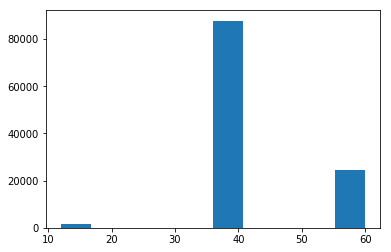

In [477]:
plt.hist(loans_apr['Term'])
plt.show();

In [478]:
loans_apr['Term'].value_counts()

36    87778
60    24545
12     1614
Name: Term, dtype: int64

`Observations:` There are only 3 term periods that all loans fall into - 12, 36, and 60 months with 80% of listings opting for a 36 month loan period. Any further investigation will be skewed.

### 2. Distribution of BorrowerAPR?

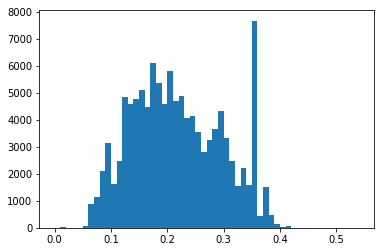

In [479]:
bin_edges = np.arange(0,0.55,0.01)
plt.hist(loans_apr['BorrowerAPR'], bins=bin_edges)
plt.show();

In [480]:
loans_apr['BorrowerAPR'].mode()

0    0.35797
dtype: float64

`Observations:` The distribution of APR is mostly normal except for a specific APR which has a peak at around .36

### 3. Distribution of employment status duration?

In [481]:
print(np.log10((loans_apr['EmploymentStatusDuration'] + 1).max()))
print(np.log10((loans_apr['EmploymentStatusDuration'] + 1).min()))

2.8785217955012063
0.0


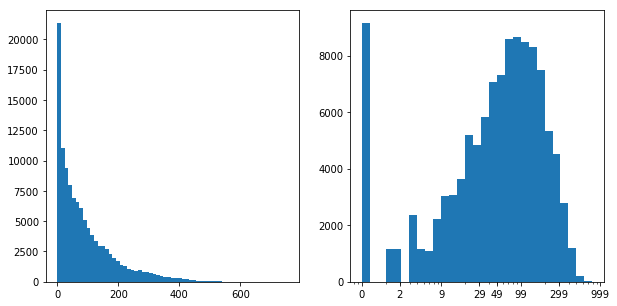

In [482]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
bin_edges = np.arange(0, loans_apr['EmploymentStatusDuration'].max()+12, 12)
plt.hist(loans_apr['EmploymentStatusDuration'], bins = bin_edges)

plt.subplot(1,2,2)
bin_edges_log = 10 ** np.arange(0, np.log10((loans_apr['EmploymentStatusDuration']+1).max()) + 0.1, 0.1)
plt.hist(loans_apr['EmploymentStatusDuration'] + 1, bins = bin_edges_log)
plt.xscale('log')
xticks = [1,3,10,30,50,100,300,1000]
xlabels = np.asarray(xticks) - 1
plt.xticks(xticks, xlabels)
plt.show();

`Observations:` The intitial distributions shows a highly right skewed plot. This is due to the extremely high incidence of no or very low employment durations among the population. Upon taking a log scale on the x-axis we see a largely normal distribution of employment durations with a peak around 96 months, except for the large spike at 0.

### 4. Distribution of Credit Lines

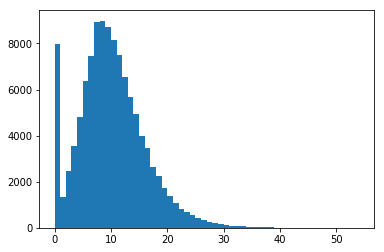

In [483]:
bin_edges = np.arange(0,55,1)
plt.hist(loans_apr['CurrentCreditLines'], bins = bin_edges)
plt.show();

`Observations`: We see a slightly right skewed distribution peaking at 10

### 5. Distribution of Debt to Income ratio

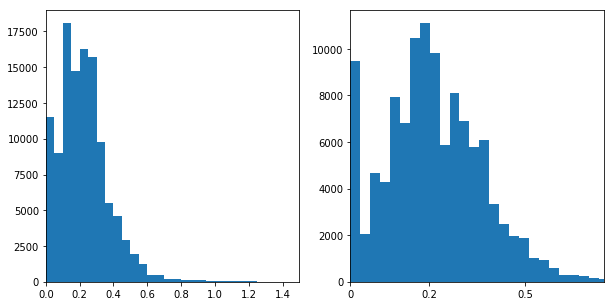

In [484]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
bin_edges = np.arange(0, loans_apr.DebtToIncomeRatio.max()+.05,.05)
plt.hist(loans_apr['DebtToIncomeRatio'], bins=bin_edges)
plt.xlim(0,1.5)

plt.subplot(1,2,2)
bin_edges_log = 10 ** np.arange(0, np.log10((loans_apr['DebtToIncomeRatio']+1).max())+.01,.01)
plt.hist(loans_apr['DebtToIncomeRatio']+1, bins=bin_edges_log)
plt.xscale('log')
xticks = [1,1.2,1.5,2,3]
xlabels = [0,0.2,0.5]
plt.xticks(xticks, xlabels)
plt.xlim(1,1.8)
plt.show();

In [485]:
(loans_apr.DebtToIncomeRatio > .5).sum()

5264

`Observations:` Again a very right skewed distribution curve. Most of the values seems to be concentrated around 0.2

### 6. Distribution of Monthly Income

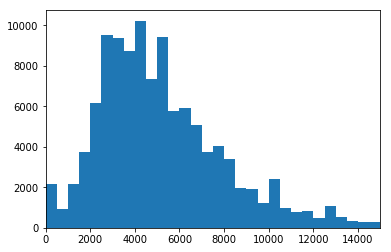

In [486]:
bin_edges = np.arange(0,loans_apr.StatedMonthlyIncome.max()+500, 500)
plt.hist(loans_apr['StatedMonthlyIncome'], bins=bin_edges)
plt.xlim(0,15000)
plt.show();

In [487]:
(loans_apr.StatedMonthlyIncome < 15000).sum() / loans_apr.shape[0]

0.9733098115625302

`Observations`: Extremely right skewed distribution of monthly incomes. It is normal in the range of 0-15000 and then tapers off sharply thereafter. However 97% of the data points reside within this range, so the remaining could be treated as outliers.

### 7. Distribution of Loan Amount

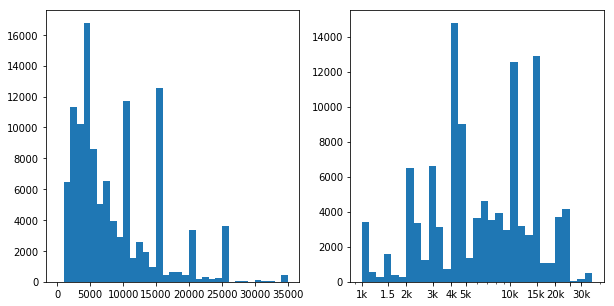

In [488]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
bin_edges = np.arange(0,36000,1000)
plt.hist(loans_apr['LoanOriginalAmount'], bins=bin_edges)

plt.subplot(1,2,2)
bin_edges = 10 ** np.arange(3,np.log10(35000)+0.05,0.05)
plt.hist(loans_apr['LoanOriginalAmount'], bins=bin_edges)
plt.xscale('log')
xticks = [1000,1500,2000,3000,4000,5000,10000,15000,20000,25000,30000]
xlabels=['1k','1.5','2k','3k','4k','5k','10k','15k','20k','','30k']
plt.xticks(xticks, xlabels)
plt.show();

`Observations:` The original plot without any transformation is right skewed, however there are interesting patterns of peaks at predictable intervals. Upon taking the log transformation, the peaks are very easily identifiable on an otherwise normal distribution. The peaks are at round figures for loan amounts of 1k, 1.5k, 2k, 3k, 4k, 10k, 15k.

### 8. Distribution of Average Credit Score Range

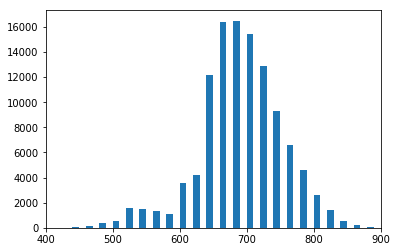

In [499]:
bin_edges = np.arange(0,loans_apr.CreditScoreRangeAverage.max()+10,10)
plt.hist(loans_apr['CreditScoreRangeAverage'], bins=bin_edges)
plt.xlim(400,900)
plt.show();

`Observations:`: Mostly normal distribution around the range where maximum data is present, maybe slightly left skewed. Most credit scores are distributed between 650 and 750.

### 9. Distribution of Credit Rating

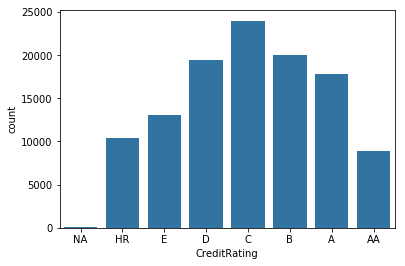

In [512]:
sb.countplot(data=loans_apr, x='CreditRating', color=base_color)
plt.show();

`Observations:` Interestingly this distribution is fairly normal. A large number of loans have been given out where the rating was between D and B.

### 10. Distribution of Origination Year

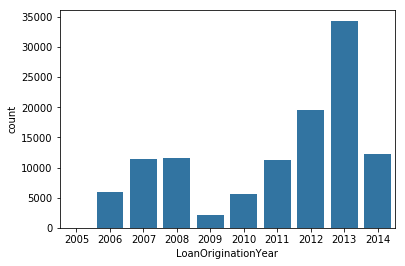

In [501]:
base_color = sb.color_palette()[0]
sb.countplot(data=loans_apr, x='LoanOriginationYear', color=base_color)
plt.show();

In [505]:
print(loans_apr.LoanOriginationDate.min())
print(loans_apr.LoanOriginationDate.max())

2005-11-15 00:00:00
2014-03-12 00:00:00


`Observations:` Data in 2005 and 2014 is not available for the whole year. Other than that, there seems to be a lull in 2009 and post that the number of loans offered is quadratically increasing. 

### 11. Distribution Quarter-wise

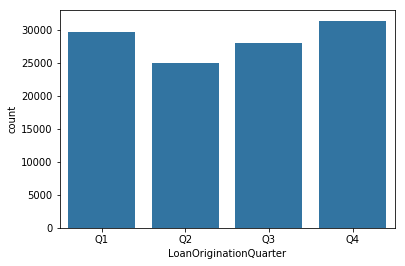

In [516]:
sb.countplot(data=loans_apr, x='LoanOriginationQuarter', color=base_color)
plt.show();

`Observations:` Nothing significant here. Loans given out in every quarter is mostly identical.

### 12. Distribution by isHomeOwner

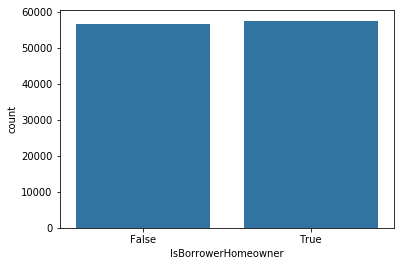

In [517]:
sb.countplot(data=loans_apr, x='IsBorrowerHomeowner', color=base_color)
plt.show();

`Observations:` The distribution is evenly mathched between home owners and non home owners.

### 13. Distribution by Employment Status

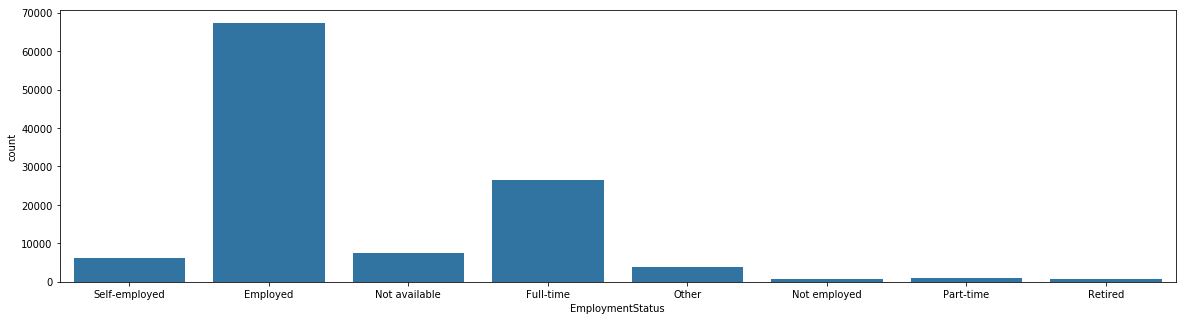

In [519]:
plt.figure(figsize=(20,5))
sb.countplot(data=loans_apr, x='EmploymentStatus', color=base_color)
plt.show();

`Observations:` Most applicants are Employed or Full-time employed.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!